In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import matplotlib.pyplot as plt
import pprint

In [2]:
df = pd.read_csv("/content/data_scopus.csv")

df.shape

(570, 13)

In [3]:
## drop the rows with no Author Affiliations and Publication Year

df= df[~pd.isnull(df['Authors with affiliations'])].copy()
df= df[~pd.isnull(df['Year'])].copy()
df.shape

(561, 13)

In [4]:
df.head(2)

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,NaN,NaN,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,NaN
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,NaN,NaN,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,NaN


In [5]:
df= df.drop(columns= ['Abstract', 'Conference name', 'Conference date'] ).copy()
df.shape

(561, 10)

In [6]:
df

,Title,Year,EID,Publisher,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,Elsevier B.V.,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,NaN
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,Academic Press,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,NaN
2,"Bridge damage: Detection, IFC-based semantic e...",2020,2-s2.0-85078194587,Elsevier B.V.,"Isailović D., Stojanovic V., Trapp M., Richter...",57205293410;56421700900;24831175200;3619515940...,"Isailović, D., Department for Construction Pro...",Automation in Construction,Autom Constr,NaN
3,VR system for spatio-temporal visualization of...,2019,2-s2.0-85075706132,Springer,"Okada K., Yoshida M., Itoh T., Czauderna T., S...",57201502480;57171240600;35373203100;2592569550...,"Okada, K., Ochanomizu University, Tokyo, Japan...",Multimedia Tools and Applications,Multimedia Tools Appl,NaN
4,DiseaSE: A biomedical text analytics system fo...,2019,2-s2.0-85074886243,Academic Press Inc.,"Abulaish M., Parwez M.A., Jahiruddin",6505934038;57202719622;35590173900;,"Abulaish, M., Department of Computer Science, ...",Journal of Biomedical Informatics,J. Biomed. Informatics,NaN
...,...,...,...,...,...,...,...,...,...,...
565,Propositional n-traces: visualizing a problem ...,1995,2-s2.0-0029533881,"IEEE, Los Alamitos, CA, United States","Prevost Nathalie, Jorgenson Loki, Jennings R.E...",6603428086;55937115800;16412349600;7003348138;,"Prevost, Nathalie, Simon Fraser Univ, Burnaby,...",Proceedings of the IEEE Visualization Conference,Proc IEEE Visual Conf,NaN
566,Fast algorithms for visualizing fluid motion i...,1995,2-s2.0-0029487213,"IEEE, Los Alamitos, CA, United States","Ueng S.K., Sikorski K., Ma Kwan-Liu",7006871353;35194562700;35242602500;,"Ueng, S.K., Univ of Utah, Salt Lake City, Unit...",Proceedings of the IEEE Visualization Conference,Proc IEEE Visual Conf,10.0
567,Fast normal estimation using surface character...,1995,2-s2.0-0029488955,"IEEE, Los Alamitos, CA, United States","Shin Byeong Seok, Shin Yeong Gil",7103027750;7402816561;,"Shin, Byeong Seok, Seoul Natl Univ, Seoul, Sou...",Proceedings of the IEEE Visualization Conference,Proc IEEE Visual Conf,4.0
568,Supporting heterogeneous data import for data ...,1995,2-s2.0-0029193549,"ACM, New York, NY, United States","Ford R., Thompson R., Thompson D.",57214569671;8713633000;7404935132;,"Ford, R., Univ of Montana, Missoula, United St...",Proceedings of the ACM Symposium on Applied Co...,Proc ACM Symp Appl Computing,NaN


# Extracting the Author IDs

In [7]:
#Extracting the each author id from the column Author(s) ID
def get_first_author_id(x):
  try:
    return x.split(";")
  except Exception as ex:
    print(x)
authorid=df['Author(s) ID'].apply(get_first_author_id).tolist()

In [8]:
type(authorid)

list

In [9]:
print(len(authorid))
a = np.empty((0))

561


In [10]:
for i in range(0,561):
  temp=np.array(authorid[i])
  temp=temp[:-1]
  a=np.hstack((a,temp))
print(a)

authorids=pd.DataFrame({'Author ID': a})
#authorids
print(len(authorids))

['57202536919' '53984550800' '57215426514' ... '7404935132' '7103063469'
 '7103384676']
1879


# Counting the Number of Publications

In [27]:
#Counting the number of publications each author has
no_of_publications=authorids["Author ID"].value_counts()
npublications=no_of_publications.reset_index()
npublications.columns = ['Author_ID', 'No_of_Publications']
npublications

,Author_ID,No_of_Publications
0,35361180100,10
1,35242602500,8
2,34769953100,7
3,7004102300,6
4,7007044166,5
...,...,...
1547,35397544400,1
1548,41561114400,1
1549,57207441584,1
1550,37059238900,1


In [28]:
#Dropping all the duplicate author ids
authorids=authorids.drop_duplicates(subset=['Author ID']).reset_index(drop=True)
len(authorids)

1552

# Extracting the Author's Name

In [29]:
def getAuthorName(authorids):
  df_temp = df
  rowIndex = 0
  results=[]
  for row in df_temp.iterrows():
    try:
      index = df_temp.iloc[rowIndex]['Author(s) ID'].split(";").index(authorids)
      author_name = df_temp.iloc[rowIndex]['Authors'].split(",")[index].strip()
      results.append({'Author': author_name, 'AuthorID': authorids})
    except:
      rowIndex += 1
      continue
  return results

id_author=authorids['Author ID'].apply(getAuthorName)

result_dataframe = pd.DataFrame([item for sublist in id_author.dropna() for item in sublist])
result_dataframe.head(3)

,Author,AuthorID
0,Zhang Y.,57202536919
1,Zhang Y.,57202536919
2,Zhang Y.,57202536919


In [30]:
authorName=result_dataframe
desiredColumns=['AuthorID', 'Author']
authorName=authorName[desiredColumns]
authorName = authorName.rename(columns={'AuthorID': 'Author_ID'})
authorName=authorName.drop_duplicates(subset=['Author_ID']).reset_index(drop=True)
authorName

,Author_ID,Author
0,57202536919,Zhang Y.
1,53984550800,Liu H.
2,57215426514,Kang S.-C.
3,6603541102,Al-Hussein M.
4,23398572100,Rapp A.
...,...,...
1547,57214569671,Ford R.
1548,8713633000,Thompson R.
1549,7404935132,Thompson D.
1550,7103063469,Hoskins J.A.


In [31]:
final_df = authorName.merge(npublications, on='Author_ID')
final_df

,Author_ID,Author,No_of_Publications
0,57202536919,Zhang Y.,1
1,53984550800,Liu H.,2
2,57215426514,Kang S.-C.,1
3,6603541102,Al-Hussein M.,2
4,23398572100,Rapp A.,2
...,...,...,...
1547,57214569671,Ford R.,1
1548,8713633000,Thompson R.,1
1549,7404935132,Thompson D.,1
1550,7103063469,Hoskins J.A.,1


## Extract the Country of the Author

In [32]:
def getCountry(authorids):
  df_temp = df
  rowIndex = 0;
  results= []
  for row in df_temp.iterrows():
    try:
      index = df_temp.iloc[rowIndex]['Author(s) ID'].split(";").index(authorids)
      author_country=df_temp.iloc[rowIndex]['Authors with affiliations'].split(";")[index].split(",")[-1].strip()
      results.append({'Author_ID': authorids, 'Country': author_country})
      counter+=1
    except:
      rowIndex += 1
      continue
  return results

id_country=authorids['Author ID'].apply(getCountry)

country_name = pd.DataFrame([item for sublist in id_country.dropna() for item in sublist])
country_name.head

<bound method NDFrame.head of         Author_ID        Country
0     57202536919         Canada
1     53984550800  United States
2     53984550800  United States
3     57215426514         Canada
4      6603541102         Canada
...           ...            ...
1874  57214569671  United States
1875   8713633000  United States
1876   7404935132  United States
1877   7103063469         Canada
1878   7103384676         Canada

[1879 rows x 2 columns]>

In [33]:
country_name=country_name.drop_duplicates(subset=['Author_ID']).reset_index(drop=True)
country_name

,Author_ID,Country
0,57202536919,Canada
1,53984550800,United States
2,57215426514,Canada
3,6603541102,Canada
4,23398572100,Italy
...,...,...
1547,57214569671,United States
1548,8713633000,United States
1549,7404935132,United States
1550,7103063469,Canada


In [34]:
list = ["Canada", "United States", "Italy", "Serbia", "Germany", "Japan", "Australia", "India", "China", "Thailand", "Russian Federation", "Poland", "Spain", "Belgium", "South Korea", "Pakistan",
        "Bulgaria", "Slovakia", "United Kingdom", "Chile", "Turkey", "Brazil", "Switzerland", "Egypt", "Hong Kong", "Saudi Arabia", "Czech Republic", "Portugal", "Tunisia", "France", "Taiwan", "Ireland",
        "Colombia", "Kazakhstan", "Philippines", "Iraq", "Austria", "Finland", "Indonesia", "Sweden", "Gabon", "Singapore", "Netherlands", "Greece", "Hungary", "Romania", "Iran", "Norway", "Trinidad and Tobago", "Denmark",
        "Ecuador", "Croatia", "Qatar", "Lithuania", "Latvia", "Malaysia", "Algeria", "Mexico", "New Zealand", "Israel" ]
print(len(list))

60


In [35]:
#correcting the countries of some authors
country_name['Country'] = country_name['Country'].replace('Univ of Massachusetts at Lowell', 'United States')
country_name['Country'] = country_name['Country'].replace('Google', 'United States')
country_name['Country'] = country_name['Country'].replace('Yahoo', 'United States')
country_name['Country'] = country_name['Country'].replace('Visible Decisions Inc', 'United States')
country_name['Country'] = country_name['Country'].replace('Polytechnic Univ', 'United States')
country_name['Country'] = country_name['Country'].replace('M.', 'United States')
country_name['Country'] = country_name['Country'].replace('B.', 'United States')
country_name['Country'] = country_name['Country'].replace('J.', 'United States')
country_name['Country'] = country_name['Country'].replace('I.', 'United States')
country_name['Country'] = country_name['Country'].replace('W.', 'United States')
country_name['Country'] = country_name['Country'].replace('K.', 'United States')
country_name['Country'] = country_name['Country'].replace('S.', 'United States')
country_name['Country'] = country_name['Country'].replace('T.D.', 'United States')
country_name['Country'] = country_name['Country'].replace('A.P.', 'United States')
country_name['Country'] = country_name['Country'].replace('J.W.', 'United States')

In [36]:
country_name['Country'] = country_name['Country'].replace('C.E', 'United States')
country_name['Country'] = country_name['Country'].replace('G.R.', 'United States')
country_name['Country'] = country_name['Country'].replace('G.J.', 'United States')

In [37]:
final_df = final_df.merge(country_name, on='Author_ID')
final_df

,Author_ID,Author,No_of_Publications,Country
0,57202536919,Zhang Y.,1,Canada
1,53984550800,Liu H.,2,United States
2,57215426514,Kang S.-C.,1,Canada
3,6603541102,Al-Hussein M.,2,Canada
4,23398572100,Rapp A.,2,Italy
...,...,...,...,...
1547,57214569671,Ford R.,1,United States
1548,8713633000,Thompson R.,1,United States
1549,7404935132,Thompson D.,1,United States
1550,7103063469,Hoskins J.A.,1,Canada


In [38]:
final=final_df
nodes = final['Author_ID'].values

In [39]:
G = nx.Graph()

In [40]:
final.head()

,Author_ID,Author,No_of_Publications,Country
0,57202536919,Zhang Y.,1,Canada
1,53984550800,Liu H.,2,United States
2,57215426514,Kang S.-C.,1,Canada
3,6603541102,Al-Hussein M.,2,Canada
4,23398572100,Rapp A.,2,Italy


In [41]:
nodes = []
for row in final.iterrows():
  nodes.append((row[1]['Author_ID'],{
      "Author": row[1]['Author'],
      "No_of_Publications" : row[1]['No_of_Publications'],
      "Country" : row[1]['Country'],
  }))

In [42]:
len(nodes)

1552

In [43]:
nodes[1551]

('7103384676',
 {'Author': 'Hoskins W.D.', 'No_of_Publications': 1, 'Country': 'Canada'})

In [44]:
G.add_nodes_from(nodes)

In [45]:
edges=[]
for row in df.iterrows():
  if ";" in row[1]['Author(s) ID']:
    authors = row[1]['Author(s) ID'][:-1].split(";")
    if len(authors) > 1:
        new_edges = ([(authors[i].strip(), authors[j].strip()) for i in range(len(authors)) for j in range(i+1, len(authors))])
        edges.extend(new_edges)
  else:
    continue

In [46]:
type(edges)

list

In [48]:
len(edges)

3190

In [49]:
G.add_edges_from(edges)

In [50]:
#pos = nx.drawing.circular_layout(G)
pos = nx.spring_layout(G)

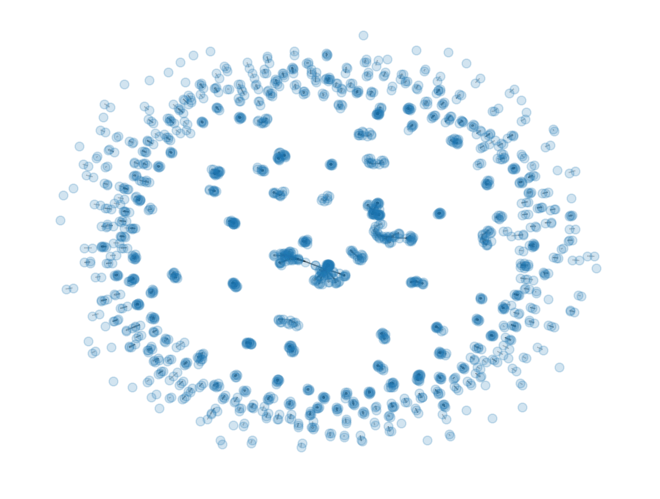

In [51]:
nx.draw(G,pos=pos, node_size=40,alpha=.2)

In [52]:
from networkx.readwrite import json_graph

In [53]:
with open("author_network.json",'w') as f:
  json.dump(json_graph.node_link_data(G),f)

In [54]:
nx.write_gml(G,"network.gml")